# Electric Motor Speed Prediction

# Name:-

## Parth Suhas Mane

 ## Objective of the Project:-
 
 ### Predict Motor Speed based on other attributes available

The dataset comprises several sensor data collected from a permanent magnet synchronous motor (PMSM) deployed on a test bench. The PMSM represents a ccTest bench measurements were collected by the LEA department at Paderborn University. This dataset is mildly anonymized.  
All recordings are sampled at 2 Hz. The dataset consists of multiple measurement sessions, which can be distinguished from each other by the column "profile_id". A measurement session can be between one and six hours long.
The motor is excited by hand-designed driving cycles denoting a reference motor speed and a reference torque. Currents in d/q-coordinates (columns "i_d" and i_q") and voltages in d/q-coordinates (columns "u_d" and "u_q") are a result of a standard control strategy trying to follow the reference speed and torque. Columns "motor_speed" and "torque" are the resulting quantities achieved by that strategy, derived from set currents and voltages.
Most driving cycles denote random walks in the speed-torque-plane in order to imitate real world driving cycles to a more accurate degree than constant excitations and ramp-ups and -downs would.


### Data Set Details:
Comprehensive csv files containing all measurement sessions and features. Each row represents one snapshot of sensor data at a certain time step. Sample rate is 2 Hz (One row per 0.5 seconds). Distinctive sessions are identified with "profile_id".

### Feature set:

#### ambient
Ambient temperature as measured by a thermal sensor located closely to the stator.

#### coolant
Coolant temperature. The motor is water cooled. Measurement is taken at the outflow.

#### u_d
Voltage d-component

#### u_q
Voltage q-component

#### motor_speed
Motor speed

#### torque
Torque induced by current.

#### i_d
Current d-component

#### i_q
Current q-component

#### pm
Permanent Magnet surface temperature representing the rotor temperature. This was measured with an infrared thermography unit.

#### stator_yoke
Stator yoke temperature is measured with a thermal sensor.

#### stator_tooth
Stator tooth temperature is measured with a thermal sensor.

#### stator_winding
Stator winding temperature measured with a thermal sensor.

#### profile_id
Each measurement session has a unique ID. Make sure not to try to estimate from one session onto the other as they are strongly independent.

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")



In [2]:
# importing dataset
data= pd.read_csv("temperature_data.csv")
data

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
0            -2.018033           4  
1            -2.017631           4  
2            -2.017343           4  
3            -2.017632           4  
4            -2.018145           4  
...                ...         ...  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72  

[998070 rows x 13 columns]

## Exploratory Data Analysis

In [3]:
# Checking shape
data.shape

(998070, 13)

There are 998070 rows and 13 columns

In [4]:
data.describe()

ambient        coolant            u_d            u_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.003905       0.004723       0.004780      -0.005690   
std         0.993127       1.002423       0.997878       1.002330   
min        -8.573954      -1.429349      -1.655373      -1.861463   
25%        -0.599385      -1.037925      -0.826359      -0.927390   
50%         0.266157      -0.177187       0.267542      -0.099818   
75%         0.686675       0.650709       0.358491       0.852625   
max         2.967117       2.649032       2.274734       1.793498   

         motor_speed         torque            i_d            i_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.006336      -0.003333       0.006043      -0.003194   
std         1.001229       0.997907       0.998994       0.997912   
min        -1.371529      -3.345953      -3.245874      -3.341639   
25%        -0.951892      -0.266917      -0.756296      -0.257269   
50%        -0.140246      -0.187246       0.213935      -0.190076   
75%         0.853584       0.547171       1.013975       0.499260   
max         2.024164       3.016971       1.060937       2.914185   

                  pm    stator_yoke   stator_tooth  stator_winding  \
count  998070.000000  998070.000000  998070.000000   998070.000000   
mean       -0.004396       0.000609      -0.002208       -0.003935   
std         0.995686       1.001049       0.999597        0.998343   
min        -2.631991      -1.834688      -2.066143       -2.019973   
25%        -0.672308      -0.747265      -0.761951       -0.725622   
50%         0.094367      -0.057226       0.005085        0.006536   
75%         0.680691       0.697344       0.772239        0.725660   
max         2.917456       2.449158       2.326668        2.653781   

          profile_id  
count  998070.000000  
mean       50.732001  
std        22.073125  
min         4.000000  
25%        32.000000  
50%        56.000000  
75%        68.000000  
max        81.000000

In [5]:
#check information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


So here we can see that there are no null values in the dataset and the data types are correctly identified

In [6]:
#checking Missing values 
data.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

There are no Null Values

In [7]:
#Check duplicate rows in dataset
data[data.duplicated()]

Empty DataFrame
Columns: [ambient, coolant, u_d, u_q, motor_speed, torque, i_d, i_q, pm, stator_yoke, stator_tooth, stator_winding, profile_id]
Index: []

There are no Duplicate rows in the data set

In [8]:
data.corr()

ambient   coolant       u_d       u_q  motor_speed    torque  \
ambient         1.000000  0.434435  0.194754  0.087430     0.078283 -0.262264   
coolant         0.434435  1.000000  0.178708  0.027851    -0.033332 -0.189617   
u_d             0.194754  0.178708  1.000000 -0.027472    -0.233828 -0.821325   
u_q             0.087430  0.027851 -0.027472  1.000000     0.716897 -0.037262   
motor_speed     0.078283 -0.033332 -0.233828  0.716897     1.000000  0.024517   
torque         -0.262264 -0.189617 -0.821325 -0.037262     0.024517  1.000000   
i_d             0.005605  0.108489  0.358517 -0.181855    -0.722914 -0.239059   
i_q            -0.260562 -0.186060 -0.796586 -0.026348     0.006323  0.996560   
pm              0.501496  0.430548 -0.082564  0.101236     0.332419 -0.072905   
stator_yoke     0.451616  0.874037  0.041428  0.106186     0.182564 -0.092207   
stator_tooth    0.396742  0.689003 -0.066256  0.149017     0.333909 -0.011055   
stator_winding  0.301883  0.509298 -0.150714  0.125445     0.393154  0.080981   
profile_id      0.384565  0.499669  0.300771 -0.122260    -0.166225 -0.257446   

                     i_d       i_q        pm  stator_yoke  stator_tooth  \
ambient         0.005605 -0.260562  0.501496     0.451616      0.396742   
coolant         0.108489 -0.186060  0.430548     0.874037      0.689003   
u_d             0.358517 -0.796586 -0.082564     0.041428     -0.066256   
u_q            -0.181855 -0.026348  0.101236     0.106186      0.149017   
motor_speed    -0.722914  0.006323  0.332419     0.182564      0.333909   
torque         -0.239059  0.996560 -0.072905    -0.092207     -0.011055   
i_d             1.000000 -0.204230 -0.299227    -0.179903     -0.387712   
i_q            -0.204230  1.000000 -0.086486    -0.098753     -0.025191   
pm             -0.299227 -0.086486  1.000000     0.695014      0.768352   
stator_yoke    -0.179903 -0.098753  0.695014     1.000000      0.949898   
stator_tooth   -0.387712 -0.025191  0.768352     0.949898      1.000000   
stator_winding -0.539924  0.060949  0.729561     0.845144      0.965633   
profile_id      0.142368 -0.256127  0.156735     0.398021      0.280994   

                stator_winding  profile_id  
ambient               0.301883    0.384565  
coolant               0.509298    0.499669  
u_d                  -0.150714    0.300771  
u_q                   0.125445   -0.122260  
motor_speed           0.393154   -0.166225  
torque                0.080981   -0.257446  
i_d                  -0.539924    0.142368  
i_q                   0.060949   -0.256127  
pm                    0.729561    0.156735  
stator_yoke           0.845144    0.398021  
stator_tooth          0.965633    0.280994  
stator_winding        1.000000    0.181908  
profile_id            0.181908    1.000000

In [9]:
# We are going to drop "profile_id" column as it is of no use for our Business objective

In [10]:
data1= data.drop('profile_id', axis = 1)
data1

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  
0            -2.018033  
1            -2.017631  
2            -2.017343  
3            -2.017632  
4            -2.018145  
...                ...  
998065        0.494725  
998066        0.494279  
998067        0.492666  
998068        0.490581  
998069        0.489382  

[998070 rows x 12 columns]

## Visualization

### 1. Univarient Analysis

In [11]:
# we created a copy of dataset just for the purpose of Visualization
figure= data1.copy()
figure

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  
0            -2.018033  
1            -2.017631  
2            -2.017343  
3            -2.017632  
4            -2.018145  
...                ...  
998065        0.494725  
998066        0.494279  
998067        0.492666  
998068        0.490581  
998069        0.489382  

[998070 rows x 12 columns]

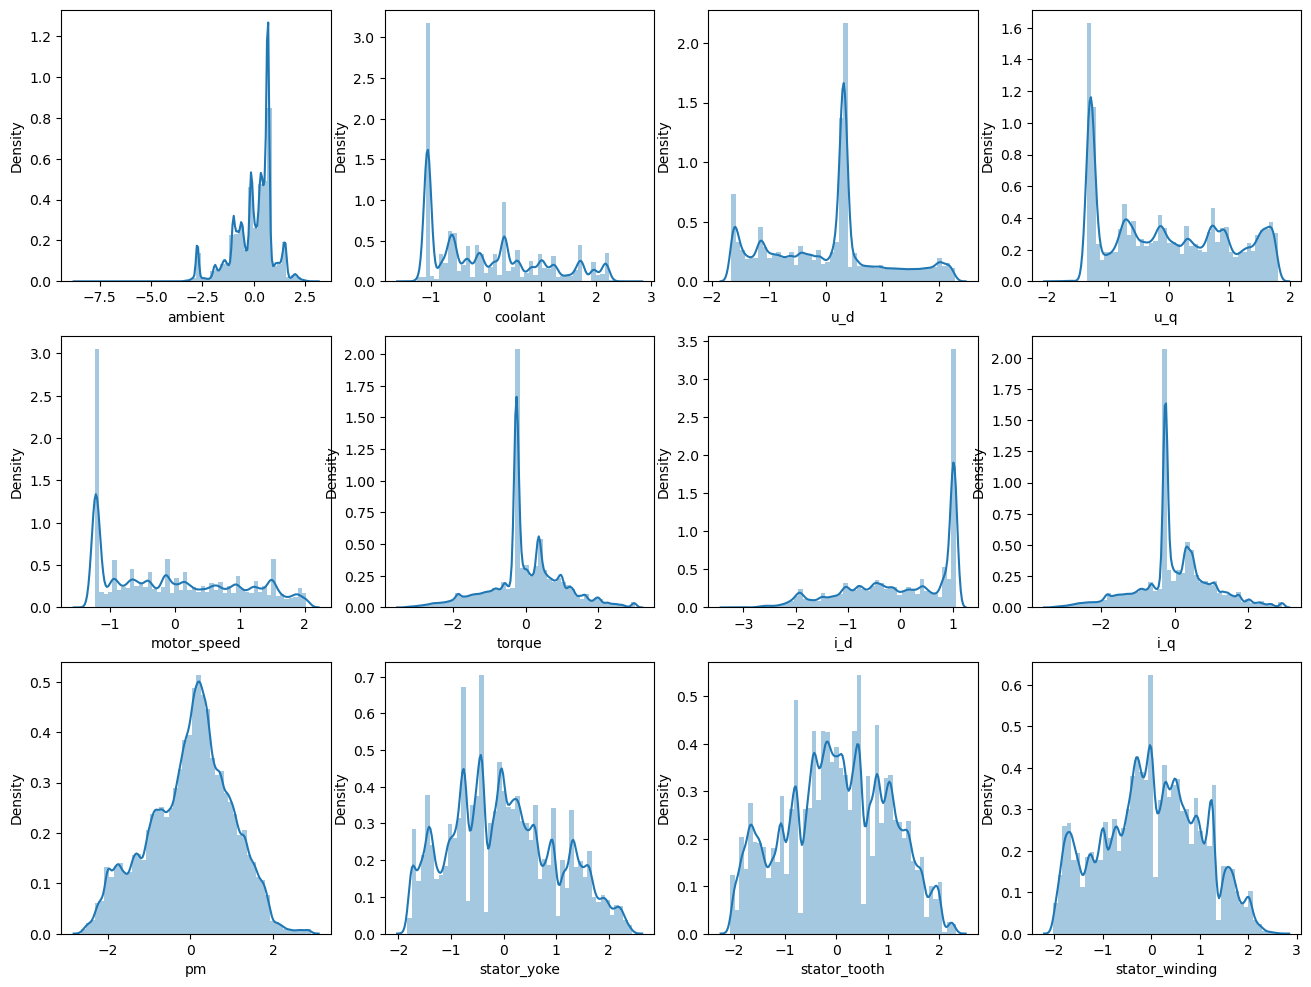

In [12]:
# Distplot
plt.figure(figsize=(16,12))
for i in range(len(data1.columns)):
    plt.subplot(3,4, i+1)
    sns.distplot(data1[data1.columns[i]])
plt.show()


In [13]:
data1.skew()

ambient          -0.848914
coolant           0.628247
u_d               0.194644
u_q               0.199885
motor_speed       0.333305
torque           -0.042660
i_d              -0.622578
i_q              -0.075705
pm               -0.232903
stator_yoke       0.257297
stator_tooth     -0.061533
stator_winding   -0.028055
dtype: float64

We can see that ambient column has negative skewness from the figure which is confirmed above that is - 0.84 skewness

In [14]:
data1.var()

ambient           0.986301
coolant           1.004853
u_d               0.995761
u_q               1.004666
motor_speed       1.002460
torque            0.995818
i_d               0.997990
i_q               0.995829
pm                0.991391
stator_yoke       1.002099
stator_tooth      0.999195
stator_winding    0.996688
dtype: float64

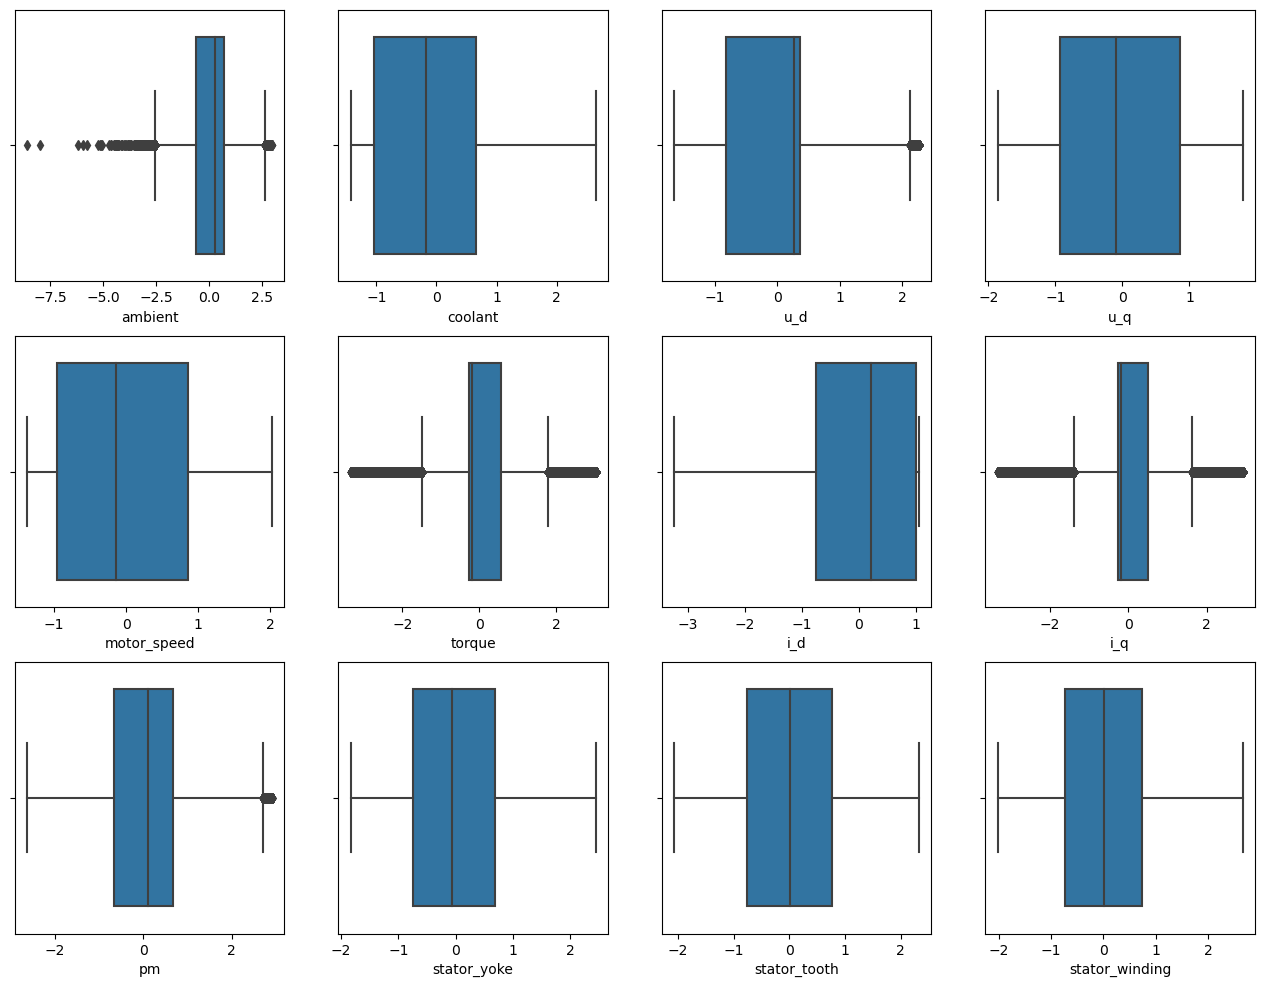

In [15]:
# boxplot
plt.figure(figsize=(16,12))
for i in range(len(data1.columns)):
    plt.subplot(3,4, i+1)
    sns.boxplot(data1[data1.columns[i]])
plt.show()


From the boxplot we can see that there are Outliers in the ambient column.

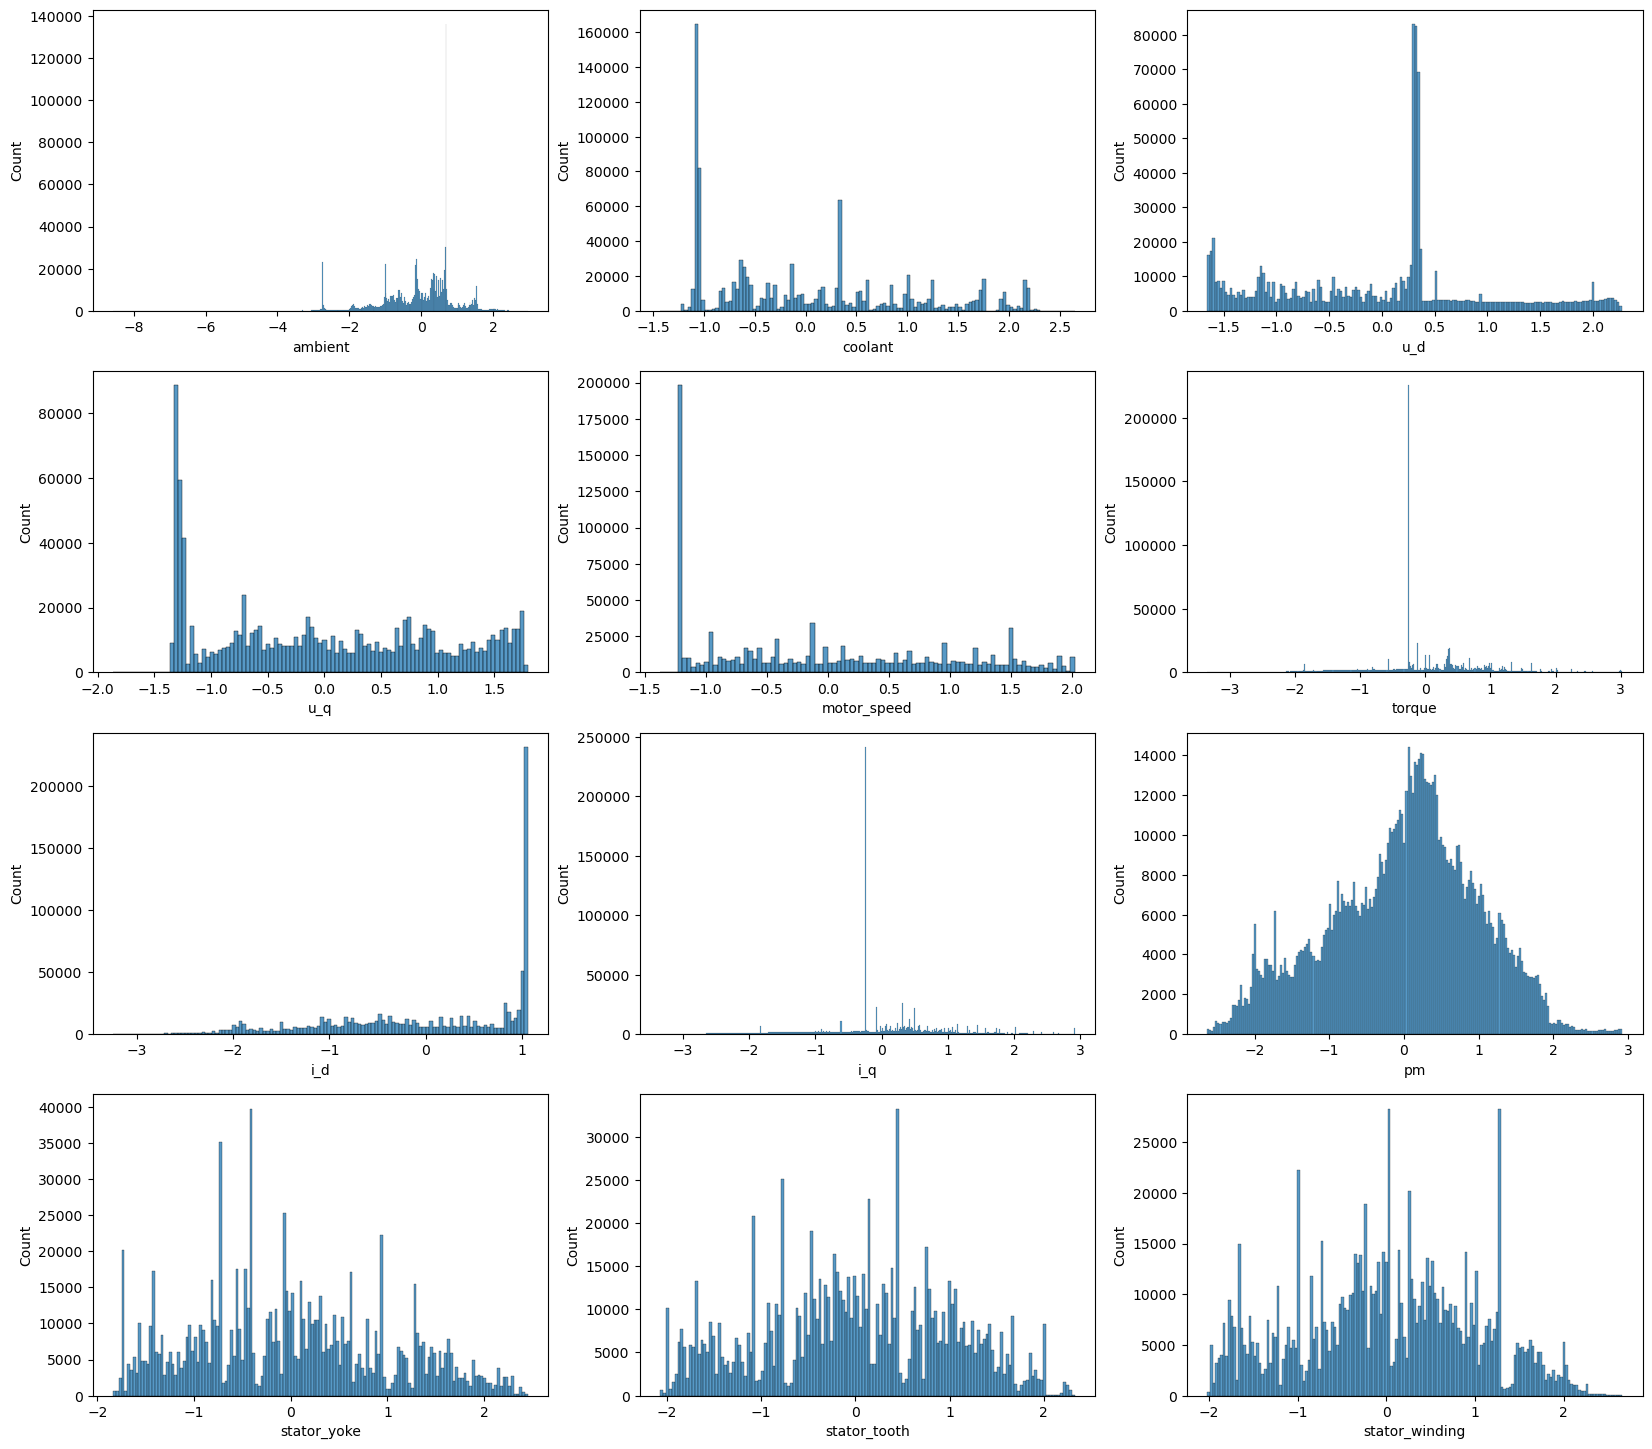

In [16]:
# Histogram
plt.figure(figsize=(20,18))
for i in range(len(data1.columns)):
    plt.subplot(4,3,i+1)
    sns.histplot(data1[data1.columns[i]])
plt.show()

### 2. Multivarient Analysis

<Figure size 1000x800 with 0 Axes>

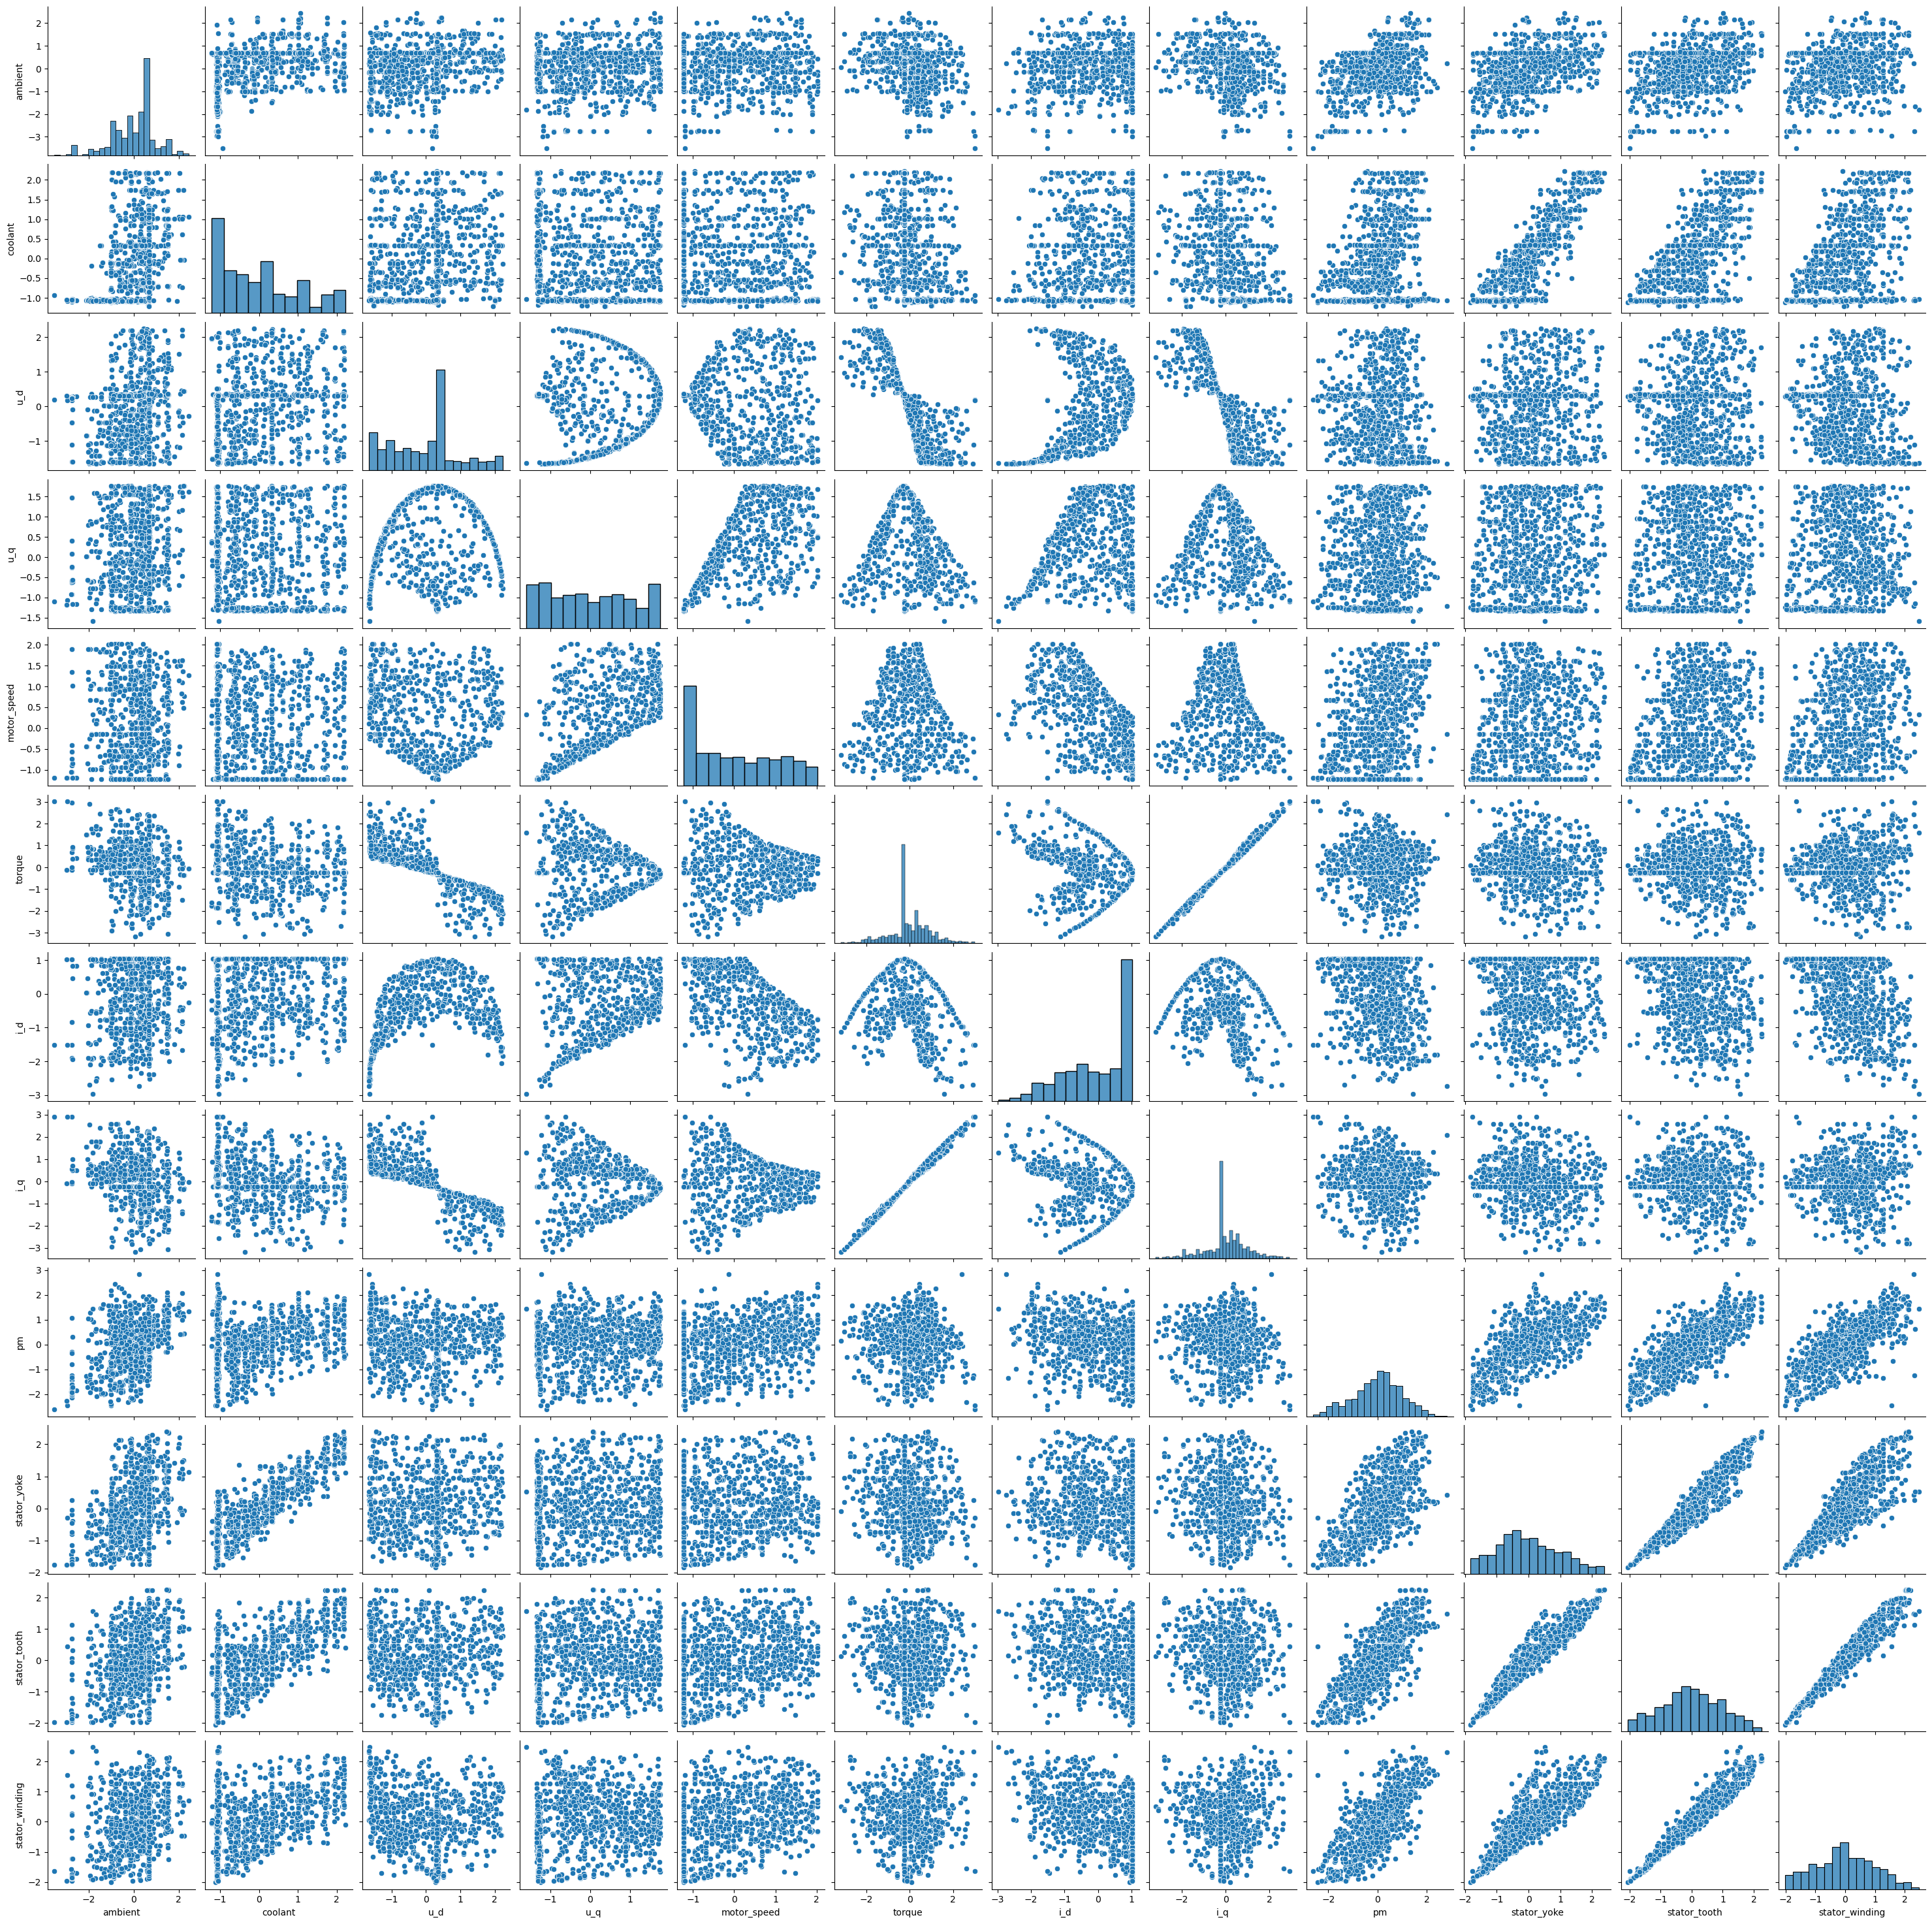

In [17]:
#plot pairplot to visualoze pairwise relationship of all the atributes at once.
plt.figure(figsize=(10,8))
sns.pairplot(data=data1.sample(1000))
plt.show()

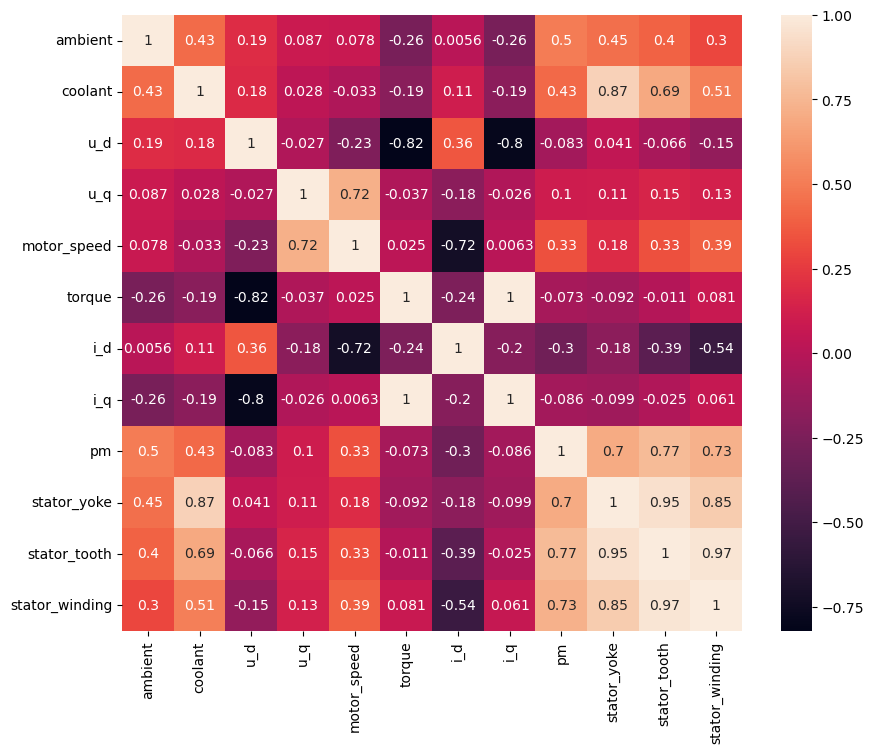

In [18]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(),annot=True)
plt.show()

## Auto EDA using Sweetviz

In [19]:
import sweetviz
my_report= sweetviz.analyze([data,"data"],target_feat="motor_speed")

                                             |                                             | [  0%]   00:00 ->…

In [20]:
my_report.show_html("Report.html")

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Defining Dependant and Independant variables

In [21]:
# Independant Variables / Features
X=data1.drop('motor_speed', axis=1)
X


ambient   coolant       u_d       u_q    torque       i_d       i_q  \
0      -0.752143 -1.118446  0.327935 -1.297858 -0.250182  1.029572 -0.245860   
1      -0.771263 -1.117021  0.329665 -1.297686 -0.249133  1.029509 -0.245832   
2      -0.782892 -1.116681  0.332771 -1.301822 -0.249431  1.029448 -0.245818   
3      -0.780935 -1.116764  0.333700 -1.301852 -0.248636  1.032845 -0.246955   
4      -0.774043 -1.116775  0.335206 -1.303118 -0.248701  1.031807 -0.246610   
...          ...       ...       ...       ...       ...       ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114 -0.255640  1.029142 -0.245723   
998066 -0.048839  0.320022  0.331701 -1.250655 -0.255640  1.029148 -0.245736   
998067 -0.042350  0.307415  0.330946 -1.246852 -0.255640  1.029191 -0.245701   
998068 -0.039433  0.302082  0.330987 -1.249505 -0.255640  1.029147 -0.245727   
998069 -0.043803  0.312666  0.330830 -1.246590 -0.255640  1.029141 -0.245722   

              pm  stator_yoke  stator_tooth  stator_winding  
0      -2.522071    -1.831422     -2.066143       -2.018033  
1      -2.522418    -1.830969     -2.064859       -2.017631  
2      -2.522673    -1.830400     -2.064073       -2.017343  
3      -2.521639    -1.830333     -2.063137       -2.017632  
4      -2.521900    -1.830498     -2.062795       -2.018145  
...          ...          ...           ...             ...  
998065  0.429853     1.018568      0.836084        0.494725  
998066  0.429751     1.013416      0.834438        0.494279  
998067  0.429439     1.002906      0.833936        0.492666  
998068  0.429558     0.999157      0.830504        0.490581  
998069  0.429166     0.987163      0.828046        0.489382  

[998070 rows x 11 columns]

In [22]:
# Dependant Variable / Target
y= data1['motor_speed']
y

0        -1.222428
1        -1.222429
2        -1.222428
3        -1.222430
4        -1.222429
            ...   
998065   -1.222428
998066   -1.222437
998067   -1.222430
998068   -1.222432
998069   -1.222431
Name: motor_speed, Length: 998070, dtype: float64

#### Splitting Data into Train and test

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.7, random_state=42)

## Model building 

### 1. Multi Linear Regression (MLR)

In [24]:
!pip install scikit-learn

In [25]:

from sklearn.linear_model import LinearRegression

In [26]:
MultiLinearRegression_Model= LinearRegression()
MultiLinearRegression_Model.fit(X_train, y_train)

LinearRegression()

Now let us see how dispersed id our data from best fit line

In [27]:
print('Model R^2 score:{:4f}'.format(MultiLinearRegression_Model.score(X_test,y_test)))

Model R^2 score:0.927793


So we got 92% which is a good score

In [28]:
y_pred=MultiLinearRegression_Model.predict(X_test)

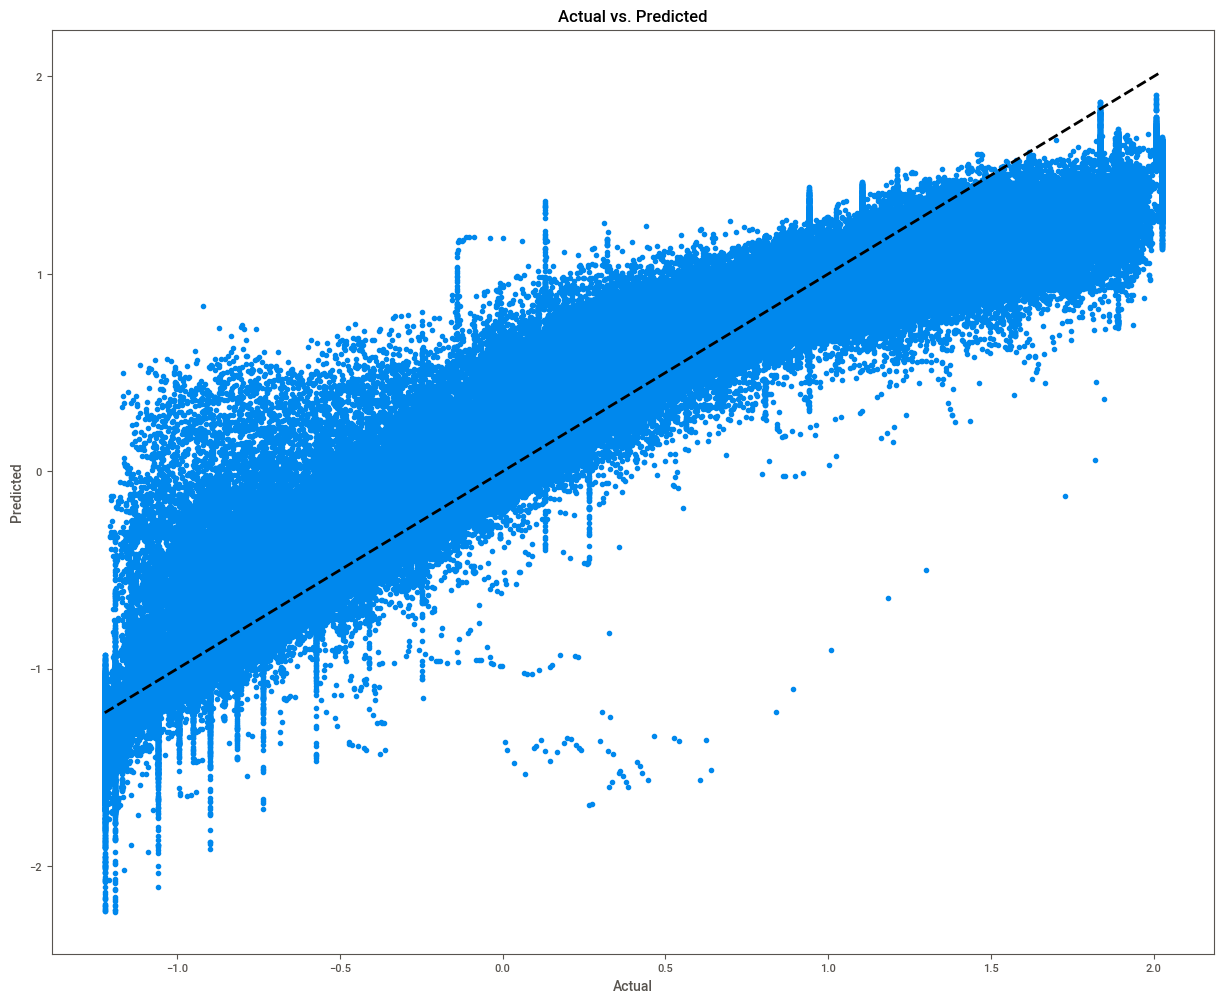

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [30]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 0.07233176522884444
RMSE: 0.2689456547870674
MAE: 0.2011073094171197
R-squared: 0.9277930503388339


In [31]:
metricdata=pd.DataFrame(columns=["Model","MSE","RMSE","MAE","R-Squared"])

In [32]:
metricdata.columns

Index(['Model', 'MSE', 'RMSE', 'MAE', 'R-Squared'], dtype='object')

In [33]:
metricdata

Empty DataFrame
Columns: [Model, MSE, RMSE, MAE, R-Squared]
Index: []

In [34]:
def model(model,x,y,metricdata, Model_name="Default", plot=False, update_metric=False):
    if len(x.columns)==12:
        All_column="All"
    else:
        All_column=len(x.columns)
    '''if plot=True it will create a plot of actual vs predicted value '''
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate R-squared (Coefficient of Determination)
    r2 = r2_score(y_test, y_pred)
    if plot==True:
        plt.figure(figsize=(15,12))
        plt.scatter(y_test, y_pred)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs. Predicted')
        #plt.show()
    else:
        metric= pd.DataFrame({'Model':Model_name, 'MSE':mse, 'RMSE':rmse, 'MAE':mae, 'R-Squared':r2,"Columns":All_column},index=[1])
    if update_metric==True:
        metricdata=pd.concat([metricdata,metric], ignore_index=True)
        return metricdata
    elif plot==True:
        return plt.show()
    else:
        return metric

In [35]:
model(LinearRegression(),X,y,metricdata, Model_name="LinearRegression")

Model       MSE      RMSE      MAE  R-Squared  Columns
1  LinearRegression  0.071952  0.268239  0.20067     0.9282       11

### MLR using statsmodel

In [36]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [37]:
#model building
smf_model=smf.ols('motor_speed~ambient+coolant+u_d+u_q+torque+i_d+i_q+pm+stator_yoke+stator_tooth+stator_winding',data=data).fit()
smf_model

In [38]:
#finding coefficients
smf_model.params

Intercept         0.000645
ambient          -0.050356
coolant           0.410205
u_d              -0.166065
u_q               0.539547
torque           -0.344221
i_d              -0.657691
i_q               0.138085
pm                0.106285
stator_yoke      -1.628973
stator_tooth      2.319161
stator_winding   -1.168371
dtype: float64

In [39]:
#finding t-values and p_values
smf_model.tvalues,np.round(smf_model.pvalues,5)

(Intercept            2.399239
 ambient           -147.500947
 coolant            244.355851
 u_d               -285.501950
 u_q               1646.147036
 torque             -79.190192
 i_d              -1417.143759
 i_q                 33.778854
 pm                 191.352464
 stator_yoke       -315.783442
 stator_tooth       340.321126
 stator_winding    -346.264952
 dtype: float64,
 Intercept         0.01643
 ambient           0.00000
 coolant           0.00000
 u_d               0.00000
 u_q               0.00000
 torque            0.00000
 i_d               0.00000
 i_q               0.00000
 pm                0.00000
 stator_yoke       0.00000
 stator_tooth      0.00000
 stator_winding    0.00000
 dtype: float64)

In [40]:
# R-squared values
smf_model.rsquared,smf_model.rsquared_adj
#when adj_rsquared is greater than rsquqred we add irrelevant feature

(0.9280781257584952, 0.928077333078494)

In [41]:
smf_model.resid

0         0.296159
1         0.293387
2         0.294733
3         0.295190
4         0.294091
            ...   
998065    0.237110
998066    0.243311
998067    0.228853
998068    0.232002
998069    0.210641
Length: 998070, dtype: float64

In [42]:
smf_model.fittedvalues

0        -1.518587
1        -1.515816
2        -1.517161
3        -1.517620
4        -1.516519
            ...   
998065   -1.459538
998066   -1.465748
998067   -1.451282
998068   -1.454434
998069   -1.433072
Length: 998070, dtype: float64

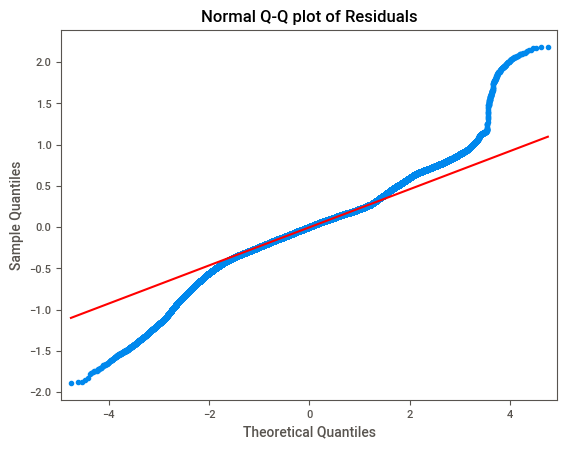

In [43]:
#Q-Q plot
qqplot=sm.qqplot(smf_model.resid,line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

## 2. ElasticNet

In [44]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic_net = ElasticNet()

In [45]:
# Define the hyperparameter grid to search
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # List of alpha values to try
    'l1_ratio': [0.1, 0.5, 0.9]       # List of l1_ratio values to try
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)

# Fit the model to your training data
grid_search.fit(X,y)
best_model = grid_search.best_estimator_

In [46]:
metricdata=model(grid_search,X,y,metricdata,"ElasticNet",update_metric=True)


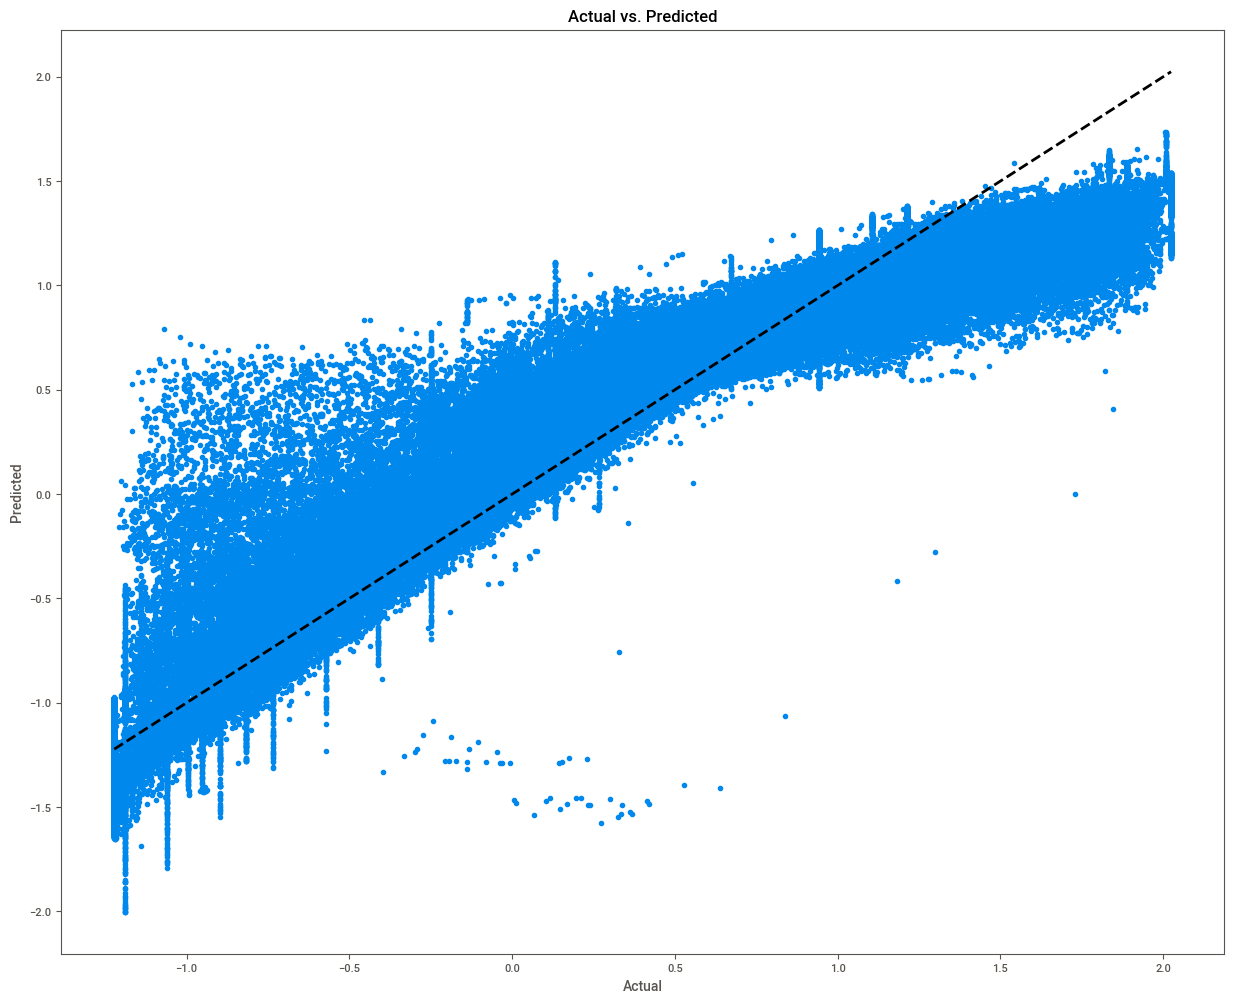

In [47]:
model(grid_search,X,y,metricdata,"ElasticNet",plot=True)

In [48]:
metricdata

Model       MSE      RMSE       MAE  R-Squared  Columns
0  ElasticNet  0.080584  0.283872  0.210186   0.919587     11.0

## LightGBM

In [49]:
import lightgbm as lgb
lgb_model=lgb.LGBMRegressor()

In [50]:
metricdata=model(lgb_model,X,y,metricdata,"Lightgbm",update_metric=True)
metricdata

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 798456, number of used features: 11
[LightGBM] [Info] Start training from score -0.005461


Model       MSE      RMSE       MAE  R-Squared  Columns
0  ElasticNet  0.080584  0.283872  0.210186   0.919587     11.0
1    Lightgbm  0.000610  0.024708  0.013872   0.999391     11.0

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 798456, number of used features: 11
[LightGBM] [Info] Start training from score -0.005461


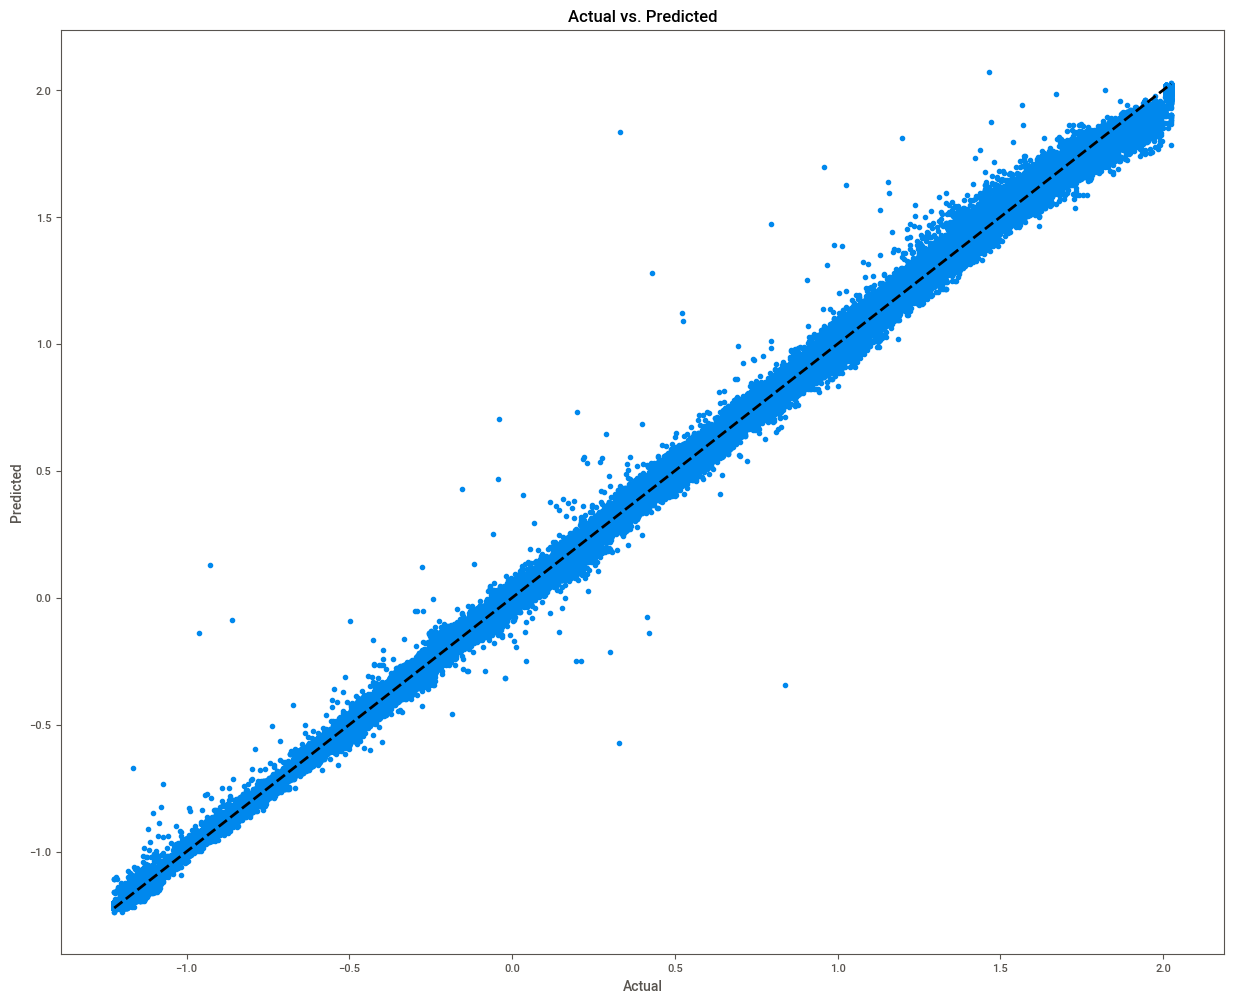

In [52]:
model(lgb_model,X,y,metricdata,"Lightgbm",update_metric=False, plot=True)

## LightGBM Grid Search

In [53]:
model_lg = lgb.LGBMRegressor()
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbose': 0
}
# Define the hyperparameter grid to search
param_grid = {
    'num_leaves': [20, 31, 40],              # Number of leaves in each tree
    'learning_rate': [0.01, 0.05, 0.1],      # Learning rate (step size in update)
    'n_estimators': [50, 100, 200],          # Number of boosting rounds (iterations)
    'min_child_samples': [1, 5, 10]          # Minimum number of data instances per leaf
}
# Create the GridSearchCV object
grid_search_lgb = GridSearchCV(estimator=model_lg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)



# Perform the grid search to find the best hyperparameters

In [55]:
metricdata=model(grid_search_lgb,X,y,metricdata,"LightgbmGrid",update_metric=True)
metricdata

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 798456, number of used features: 11
[LightGBM] [Info] Start training from score -0.005461


Model       MSE      RMSE       MAE  R-Squared  Columns
0    ElasticNet  0.080584  0.283872  0.210186   0.919587     11.0
1      Lightgbm  0.000610  0.024708  0.013872   0.999391     11.0
2  LightgbmGrid  0.000328  0.018102  0.009540   0.999673     11.0

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 798456, number of used features: 11
[LightGBM] [Info] Start training from score -0.005461


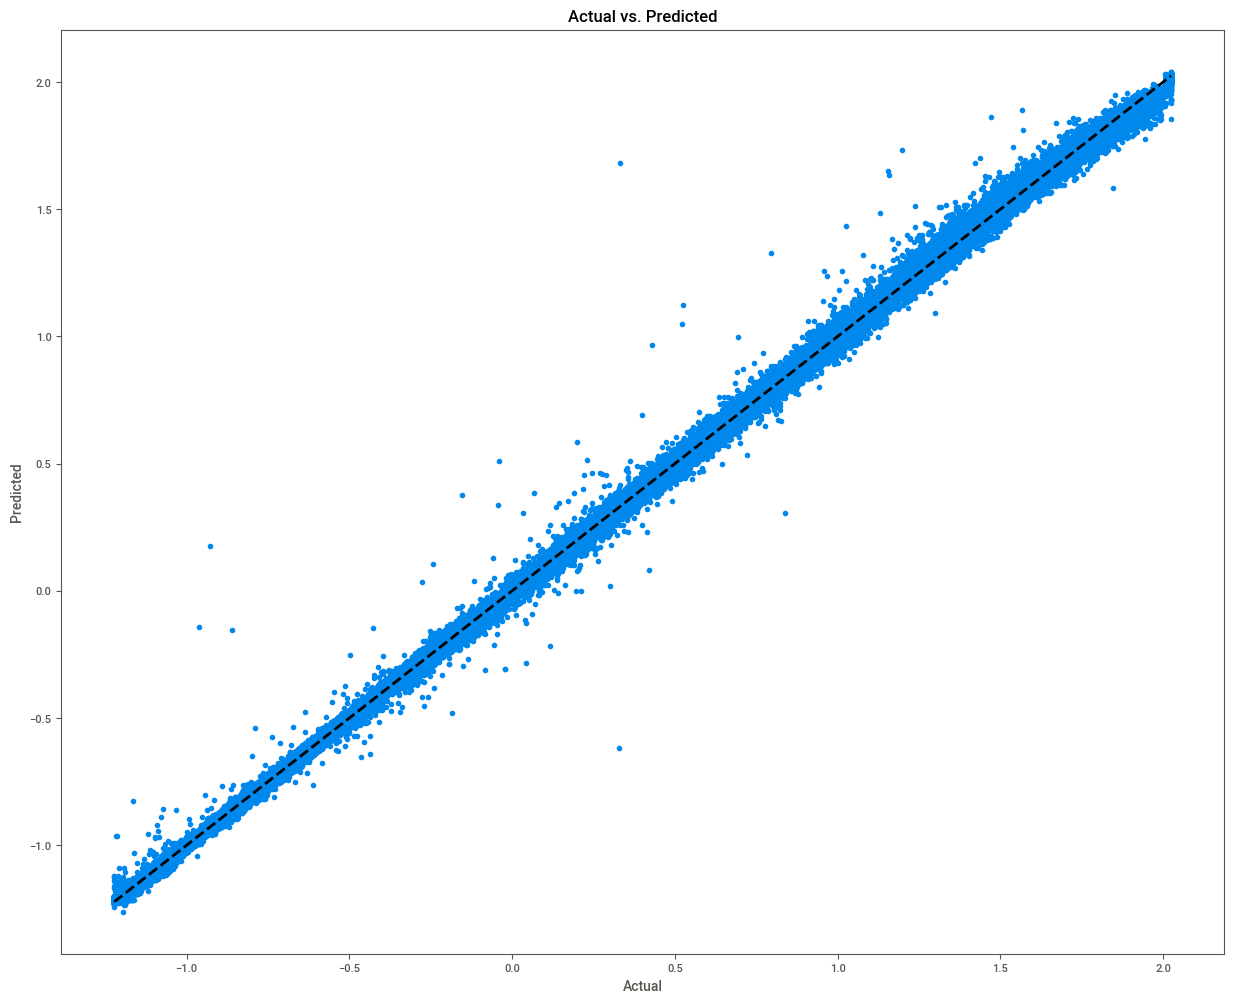

In [56]:
model(grid_search_lgb,X,y,metricdata,"LightgbmGrid",update_metric=False, plot=True)

In [57]:
best_model=grid_search_lgb.best_estimator_

In [58]:
import lightgbm as lgb
import pickle


with open('lightgbm_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [59]:
len(y_pred)

299421

In [60]:
len(y_test)

299421

In [61]:
pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

y_test    y_pred
569037  1.623718  0.995274
12747  -0.140247 -0.106289
186484 -0.305277 -0.150266
133839 -1.141252 -1.322483
568333  0.576991  0.550262
...          ...       ...
572241 -1.222430 -1.328786
340263  0.941945  1.272182
146005  1.888853  1.260076
859848 -0.816374  0.359124
949729 -1.222431 -1.196655

[299421 rows x 2 columns]